### <p style="text-align: right;"> &#9989; Nathan Kurt</p>

# __CMSE  201 - Fall 2018__
     
<img src="https://cmse.msu.edu/_cmse/assets/Image/CMSE-bigger.png"
     alt="CMSE Grapical Image"
     align="right" 
     height="82" 
     width="82" />

# Homework 5: Working with data using Pandas and Fitting data with a model

## Goals

### By the end of the homework assignment you will have practiced:

1. Reading and visualizing data with Pandas
2. Fitting data using `curve_fit` and `polyfit`
3. Modeling population growth and finding best fit parameters

## Assignment instructions

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

**This assignment is due at 11:59pm on Friday, November 9th.** It should be uploaded into the "Homework Assignments" submission folder for Homework #5.  Submission instructions can be found at the end of the notebook.

## Grading

* Examining avocado cost data (**21 points**)
    - Loading and inspecting the data (3 points)
    - Determining most and least expensive avocados (4 points)
    - Tallying total avocado sales (4 points)
    - Visualizing avocado price trends (7 points)
    - Looking for correlations (3 points)
* Revisiting the Population Model (**14 points**)
    - Loading population data (2 points)
    - Modeling population growth using `curve_fit` (7 points)
    - Modeling population growth using `polyfit` (5 points)
    
**Total**: 35 points

---
## Part 1: Exploring the cost of avocados (21 points)

### Loading the data and inspecting the content (3 points)

Not long ago, an Australian millionaire made a claim that the reason some millenials aren't able to buy a house is because they [eat too much avocado toast](https://www.cnbc.com/2017/05/16/millionaire-tells-millennials-to-stop-buying-avocados-to-afford-a-home.html). While this is a pretty big oversimplification of the financial challenges associated with buying a home, it's certainly true that [avocados have become a pretty popular food in recent years](https://www.cnbc.com/2017/07/21/americans-spend-900000-a-month-on-avocado-toast.html).

Whether or not you're a fan of this particular brunch favorite, you have the skills to dig into whether or not there is any substance to this claim. Using the provided dataset, `avocado_full.csv`, you're going to explore the real costs associated with buying avocados.

To get started, you should include import commands for `pyplot`, `numpy`, and `pandas`. Don't forget to include the command for making sure any plots you create will show up in your notebook!

In [77]:
# Put import commands here
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
# uncomment the following line if you want to make higher quality plots than the default (PNG)
set_matplotlib_formats('pdf', 'svg') 
from pandas.plotting import lag_plot
import pandas as pd
import numpy as np
%matplotlib inline 
import seaborn as sns # import Seaborn; everyone calls it "sns" so you might as well do that too
# You'll probably need to load some other modules as well

Then, you should make sure to **read in the avocado data file as a pandas dataframe.**

In [2]:
# Load in the avocado data here
avocado_full = pd.read_csv("avocado_full.csv")


Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Date Number'],
      dtype='object')

Now, **write some code to inspect the properties of the data and then answer the following questions**:

* How many rows are contained in the dataset?
* What information do the columns contain?

The original dataset came from [here](http://www.hassavocadoboard.com/retail/volume-and-price-data), which might help shine a light on what the columns mean.

In [80]:
# Put your code here
print(avocado_full.columns)
#avocado_full.head()
avocado_full.tail()

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Date Number'],
      dtype='object')


Date  AveragePrice  Total Volume     4046     4225    4770  \
18244  2018-02-04          1.63      17074.83  2046.96  1529.20    0.00   
18245  2018-01-28          1.71      13888.04  1191.70  3431.50    0.00   
18246  2018-01-21          1.87      13766.76  1191.92  2452.79  727.94   
18247  2018-01-14          1.93      16205.22  1527.63  2981.04  727.01   
18248  2018-01-07          1.62      17489.58  2894.77  2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18244    13498.67    13066.82      431.85          0.0  organic  2018   
18245     9264.84     8940.04      324.80          0.0  organic  2018   
18246     9394.11     9351.80       42.31          0.0  organic  2018   
18247    10969.54    10919.54       50.00          0.0  organic  2018   
18248    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  Date Number  
18244  WestTexNewMexico     736729.0  
18245  WestTexNewMexico     736722.0  
18246  WestTexNewMexico     736715.0  
18247  WestTexNewMexico     736708.0  
18248  WestTexNewMexico     736701.0

18249 Rows
Column Information is ```Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Date Number']```

### Determining the cheapest and most expensive regions to buy avocados in (4 points)

We'll start off out exploration of avocado cost by figuring out which regions have the most expensive and the cheapest avocados. 

Using the Pandas dataframe you've created, determine:

1) **Which "region" has had the most expensive avocado on average and on what date was this average price recorded? What was the price?**

2) **Which "region" has had the least expensive avocado on average and on what date was this average price recorded? What was the price?**

In [49]:
# Put your code here
avocado_full[avocado_full['AveragePrice'] == avocado_full['AveragePrice'].max()]

Date  AveragePrice  Total Volume     4046      4225  4770  \
14125  2016-10-30          3.25      16700.94  2325.93  11142.85   0.0   

       Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
14125     3232.16     3232.16         0.0          0.0  organic  2016   

             region  Date Number  
14125  SanFrancisco     736267.0

In [106]:
avocado_full.max()

Date                  2018-03-25
AveragePrice                3.25
Total Volume         6.25056e+07
4046                 2.27436e+07
4225                 2.04706e+07
4770                 2.54644e+06
Total Bags           1.93731e+07
Small Bags           1.33846e+07
Large Bags            5.7191e+06
XLarge Bags               551694
type                     organic
year                        2018
region          WestTexNewMexico
Date Number               736778
dtype: object

In [46]:
avocado_full[avocado_full['AveragePrice'] == avocado_full['AveragePrice'].min()]

Date  AveragePrice  Total Volume    4046     4225  4770  \
15261  2017-03-05          0.44      64057.04  223.84  4748.88   0.0   

       Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
15261    59084.32      638.68    58445.64          0.0  organic  2017   

                 region  Date Number  
15261  CincinnatiDayton     736393.0

1). SanFrancisco, 10-30-2016, $3.25

2). Cincinnati/Dayton, 3-5-2017, $0.44

### Tallying total avocado sales (4 points)

The columns that have numbers as their label correspond to the PLU (price look up) code for three sizes of Hass avocados. In particular, the PLU codes correspond to:

1. small hass (4046)
2. large hass (4225)
3. extra large hass (4770)

The values in the columns are the number of individual avocados sold for that particular size of avocado.

**Using this information, calculate the total number of avocados sold individually for each of the three sizes for the entire US for the entire dataset (i.e. spanning the years 2015 to 2018).**

The region label "TotalUS" contains the information for combined sales for the entire US. You can use these rows to final the total number of each size of avocado sold over the last three years. You should be able to use a mask to isolate all of the rows that correspond to the combined US information.

**Which avocado size is sold the most in the US?**

In [72]:
# Put your code here
mask = avocado_full['region'] == "TotalUS"
us_avocado = avocado_full[mask]
#small = us_avocado["4046"].sum()
small_hass = f"{us_avocado['4046'].sum()} Small Hass Avocados were sold\n"
large_hass = f"{us_avocado['4225'].sum()} Large Hass Avocados were sold\n"
extra_large_hass = f"{us_avocado['4770'].sum()} Extra Large Hass Avocados were sold\n"
print(small_hass,large_hass,extra_large_hass)
print(max(us_avocado['4046'].sum(),us_avocado['4225'].sum(),us_avocado['4770'].sum()))

2054936231.47 Small Hass Avocados were sold
 2015011554.7399998 Large Hass Avocados were sold
 156175183.13000003 Extra Large Hass Avocados were sold

2054936231.47


The small avocados sold the most in the US

### Visualizing avocado cost trends (7 points)

Now that you understand a bit about the cost of avocados and how many avocados are being sold in the US. We're going to work on visualizing some of the data.

First, **make a plot of the average price of avocados in Detroit as a function of time**. You should be able to use the `plot_date` function and the "Date Number" column in the dataset, similar to what we did in class when looking at the presidential approval ratings and the weather data.

Your plot should:

1. include axis labels
2. have a title
3. use the seaborn plot style (you need to import the package and then "set" the style)


Text(0,0.5,'Avg Price(US Dollars)')

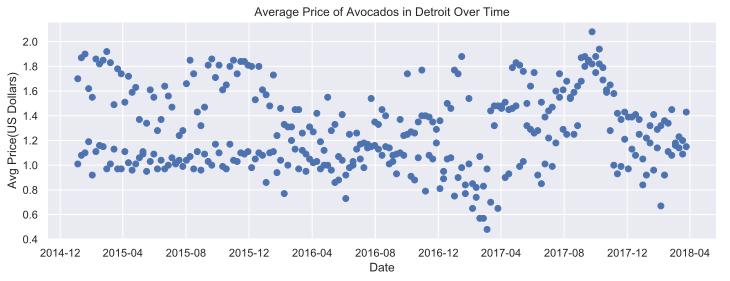

In [78]:
# Put your code here
## DO NOT DELETE THE FOLLOWING LINE
## (it is included to make sure you get a decent looking plot)
plt.figure(figsize=(12,4))
sns.set()
detroit_avocados = avocado_full[avocado_full['region'] == "Detroit"]
plt.plot_date(detroit_avocados['Date Number'], detroit_avocados["AveragePrice"])
plt.title("Average Price of Avocados in Detroit Over Time")
plt.xlabel("Date")
plt.ylabel("Avg Price(US Dollars)")

In looking at your resulting plot, you might notice that it seems like there are two separate clusters of avocado prices, a more expensive cluster and a cheaper cluster, especially at early times.

**Exam the dataset and see if you can figure out what these two different price groups correspond to.**

Use the information you find in the data to **make a new plot** in which you color these two different price groupings using different colors and provide labels and a legend to indicate what the groups correspond to.

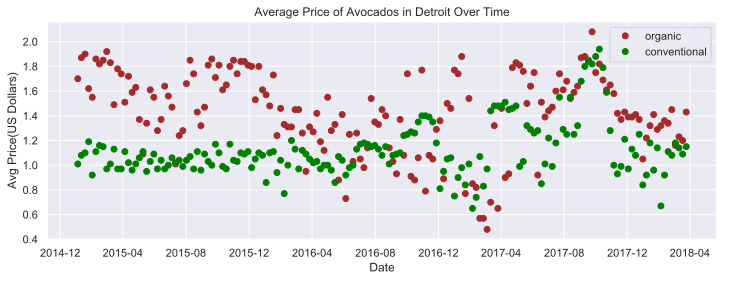

In [83]:
# Put your code here
plt.figure(figsize=(12,4))
organic_avocados = detroit_avocados[detroit_avocados["type"] == "organic"]
normal_avocados = detroit_avocados[detroit_avocados["type"] == "conventional"]
plt.plot_date(organic_avocados["Date Number"], organic_avocados["AveragePrice"], color="brown", label="organic")
plt.plot_date(normal_avocados["Date Number"], normal_avocados["AveragePrice"], color="green", label="conventional")
plt.title("Average Price of Avocados in Detroit Over Time")
plt.xlabel("Date")
plt.ylabel("Avg Price(US Dollars)")
plt.legend()

Now, review the following article about the cost of avocados: https://www.detroitnews.com/story/life/food/2017/08/23/avocado-prices/104896844/ 

**Do your results support or refute the information presented in the article?** Explain why or why not.

When this article was written in 2017, it looks like there was a large spike in avocado prices then and the graph shows that. Now it looks like they are going back down though. 

### Looking for correlation in sales volume

Now you're going to see if number of small hass avocados sold in Detroit is correlated with the number of large hass avocados sold in Detroit. Use Seaborn's `jointplot` function to plot the large hass sales versus small hass sales for Detroit. **Make sure that your plot includes the regression line!**

In [85]:
import scipy.stats as stats

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


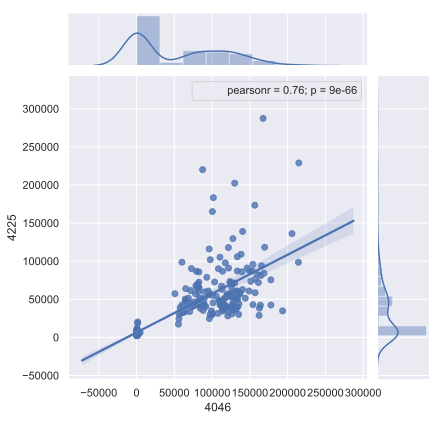

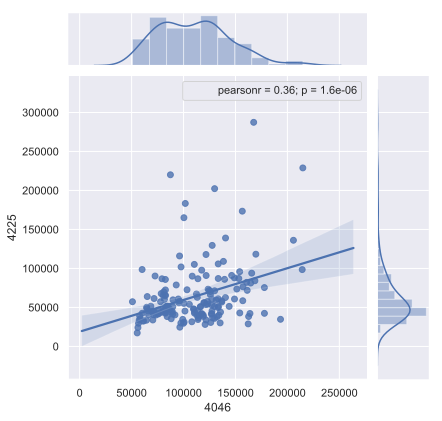

In [90]:
# Put your code here
b = sns.jointplot(detroit_avocados["4046"], detroit_avocados["4225"], kind = "reg")
b.annotate(stats.pearsonr)
plt.show()

new_filter = detroit_avocados.where(detroit_avocados > 5000)
b = sns.jointplot(new_filter["4046"], new_filter["4225"], kind = "reg")
b.annotate(stats.pearsonr)
plt.show()

**Question**: Does the number of small hass avocados sold appear to be correlated with the number of large hass avocados sold?

Notice the points in the lower left corner of the plot. There appears to be a lot of points with sales below a few thousand. Are these values biasing the correlation you are/aren't finding? What if you filter out these entries with so few avocados sold? Does it change how strong or weak the correlation is?

Not really, the pearsonr value is only .76 which shows a positive correlation but not strong enough to draw any conclusions from it. 
And when you filter the values out, the correlation actually becomes weaker. 

---
## Part 2: Revisiting the Population Model (14 points)

In this part of the assignment, you'll practice fitting a model to data, much like we did in class with the presidential approval ratings data and the weather data. However, rather than just using a generic `polyfit` solution, we'll use a specific model aimed at tracking the growth of a population. In fact, you used this very same model in Homework #2.

In [91]:
# RUN THIS CELL! You'll be using curve_fit for this section of the assignment
from scipy.optimize import curve_fit

The model we used last time is a model of a population with a decreasing growth rate. The model is given by

$$N(t)=\frac{\mu \nu e^{kt}}{\nu e^{kt}+ \mu - \nu}$$

where $k$ is the growth rate, $\nu$ is the initial population, and $\mu$ is the [carrying capacity](https://en.wikipedia.org/wiki/Carrying_capacity).

### Loading the population data (2 points)

To start off, you need to load the `population.csv` file that we used in Homework #2. You should be able to download the file from D2L again, if necessary.

**Read in the data using Pandas in the cell below.**

**Important**: This file doesn't have any header information, but pandas will try to figure out what the column names are by default. If you let pandas do this, the first line of the file will end up being used as the column names. You need to figure out how to stop Pandas from doing this!

In [109]:
# Read in the data using pandas here, and show the first few rows
population = pd.read_csv("population.csv",names=["Time", "Population"])
population.head()
#population.columns

Time  Population
0     0        10.0
1     1        15.0
2     2        23.0
3     3        36.0
4     4        50.0

### Defining the model function and using `curve_fit` (7 points)

Now that we have our data loaded, we need to make a function that defines our "$N(t)$" population model using the following parameters: $k$, $\nu$, and $\mu$.

**Write a function in the cell below that returns the value of $N$ at a given time, $t$. The function should take as input $t$, $k$, $\nu$, and $\mu$**

In [111]:
# Define the population model function here
from math import e
def pop_val(t,k,v,u):
    return ((u * v * e **(k*t))/(v*e ** (k*t) + u - v))

Our next step is to use Scipy's `curve_fit` function to estimate our parameter values. You should review the documentation for `curve_fit`, which you can find [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html).

We can use the first column from our dataset as the "x" values for the function, which is just time, and the second column as our "y" values. **Use curve_fit to estimate the values of the parameters in the model: $k$, $\nu$, and $\mu$; and print out the values!** Make sure you include the right import command so that you can use curve_fit!

Once you have your estimated parameter values, **use them to compute the expected values of $N(t)$ for the range of time spanned by the times contained in the data.**


In [120]:
# Call the curve_fit function here
n_list = []
popt, pcov = curve_fit(pop_val, population["Time"], population["Population"])
# Use your population function and fitted parameter values to get the expected values
print(popt)
k_estimated = popt[0]
v_estimated = popt[1]
u_estimated = popt[2]

for t in population["Time"]:
    n_list.append(pop_val(t,k_estimated,v_estimated,u_estimated))

print(n_list)

[  0.51317046   8.66339566 199.19055397]
[8.663395657830748, 14.062742482722344, 22.43098700405354, 34.84169309754413, 52.095279420420546, 74.043547081621, 99.01438167484304, 124.05846554808868, 146.1927572499314, 163.67307702903543, 176.29095893180522, 184.81981209852543, 190.33175554548862, 193.79133642750273, 195.92305903100532, 197.22168444687858, 198.00730431620613, 198.48057402032458, 198.76495477964306, 198.9355738437238, 199.03784573934686]


Now that you've used curve_fit to estimate the parameters values and compute the expected values for $N(t)$, **plot the actual data and overplot the model values in the cell below.** Make sure you include appropriate labels!

199.19055397020156
8.663395657830748


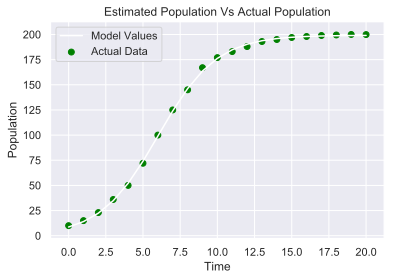

In [140]:
# Put your plot code here
plt.plot(population["Time"],n_list, color = "White", label = "Model Values")
plt.scatter(population["Time"],population["Population"], color = "Green", label = "Actual Data")
plt.legend()
plt.title("Estimated Population Vs Actual Population")
plt.ylabel("Population")
plt.xlabel("Time")
print(u_estimated)
print(n_list[0])

**Question:** How do the results of `curve_fit` compare to your previous results from Homework #2 when you found the fit "by eye"? How well did you do compared to curve_fit? Which method was easier? 

This way is much more accurate and pandas makes it way easier. 

**Question**: What is the carrying capacity returned to you by curve_fit? What is the initial population based on the fit? Do these values make sense?

Carrying Capacity is 199.19 and Initial Population was 8.6

These values make sense and are super close to the actual data

### Trying to use `polyfit` instead (5 points)

What if you'd only had the population dataset but no real idea what the underlying model should be? In a situation like this, you could try using polyfit to come up with a model that matches the data. While this wouldn't necessary tell you what the carry capacity or the growth rate for the population is, it could still allow you to predict new values.

**Use `polyfit` to fit the population data from the file.** You can choose the order of of the polynomial to use that best fits the data and you should **justify your choice**. Once you have your fit, use `poly1d` to calculate the model values and **overplot those values with the data**. As always, include appropriate labels!

[ 1.57440694e-08 -1.89543486e-06  9.63640661e-05 -2.68902486e-03
  4.46952667e-02 -4.47822489e-01  2.60545804e+00 -8.17589524e+00
  1.40018270e+01 -3.35131307e+00  1.00402148e+01]
           10             9             8            7          6
1.574e-08 x  - 1.895e-06 x + 9.636e-05 x - 0.002689 x + 0.0447 x
           5         4         3      2
 - 0.4478 x + 2.605 x - 8.176 x + 14 x - 3.351 x + 10.04


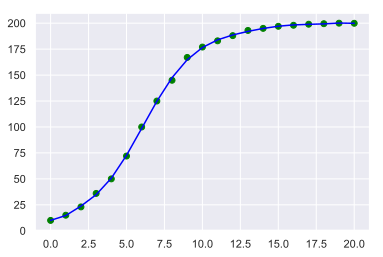

In [173]:
# Put your code here
parameters = np.polyfit(population["Time"],population["Population"],10)
print(parameters)

linear_appr = np.poly1d(parameters)
print(linear_appr)
expected_pop = linear_appr(population["Time"])


plt.scatter(population["Time"],population["Population"], color = "Green", label = "Actual Data")
plt.plot(population["Time"], expected_pop, color = "Blue", label = "Expected")

The 10th Degree polynomial seems to be the best fit based on trying all of the other ones. 4 and up all looked pretty close, but 10 looked the most accurate I think

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [174]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://goo.gl/forms/5UVzxoNv16l3q9ey2" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" folder, find the submission link for Homework #5, and upload it there.